# Tratamento de Dados

## Bibliotecas

In [53]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 369 kB/s 


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='white')

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/felipedidier/webscraping_calculadora_de_aluguel/main/df_zapimoveis.csv', delimiter ='|', encoding='utf-8-sig')

In [3]:
df.head()

,property_describe,price,area,room,bath,garage,address
0,Venha morar onde o melhor da vida acontece! Ru...,R$ 759.000,100 m²,3,4,3,"Rua Gonçalves Ledo, Centro"
1,"LANÇAMENTO MYRTOS CONDOMINIUM! 3 suítes, sendo...",R$ 672.000,93 m²,3,3,2 - 4,"Rua Antônio Augusto, Aldeota"
2,O Tango Plaza de Fátima é resultado de uma arq...,Sob consulta,141 - 166 m²,3 - 4,NaN,2 - 3,"Rua Doutor José Vítor, Fátima"
3,Park Brasil Residence Nosso empreendimento est...,R$ 429.070,82 m²,3,2,2,"Rua Equador, Parangaba"
4,Vendo terreno de 2200 m² no Cambeba próximo ao...,R$ 4.700.000,2200 m²,4,6,4,"Cambeba, Fortaleza"


In [4]:
df.duplicated().sum()

2

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(856, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 857
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   property_describe  856 non-null    object
 1   price              856 non-null    object
 2   area               856 non-null    object
 3   room               856 non-null    object
 4   bath               832 non-null    object
 5   garage             856 non-null    object
 6   address            856 non-null    object
dtypes: object(7)
memory usage: 53.5+ KB


In [8]:
df.isna().sum()

property_describe     0
price                 0
area                  0
room                  0
bath                 24
garage                0
address               0
dtype: int64

## Tratamento por coluna

In [9]:
def trans_values(df, col):
  return df[col].str.replace(r"\ -.*","").str.replace(r"\ m.*","").astype(float)

### Bath

Tipos de dados presentes na feature:

In [10]:
df['bath'].value_counts()

2        385
3        233
4         93
1         80
5         29
6          5
3 - 4      2
2 - 3      2
7          2
10         1
Name: bath, dtype: int64

Ajustando os valores não numéricos:

In [11]:
df['bath'] = trans_values(df, 'bath')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


Aplicando aos valores nulos o valor da mediana:

In [12]:
df['bath'].fillna(df['bath'].median(), inplace=True)

In [13]:
df['bath'].isna().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


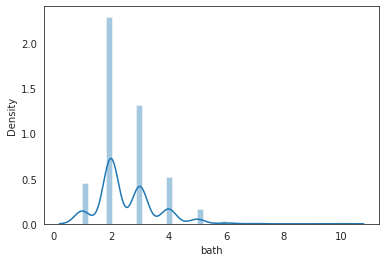

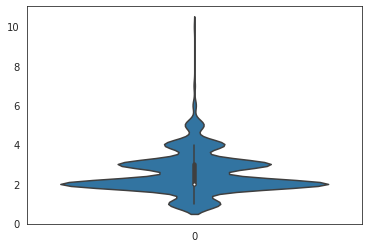

In [14]:
sns.distplot(df['bath'])
plt.show()
sns.violinplot(data=df['bath'])
plt.show()

### Room

In [15]:
df['room'].value_counts()

3        533
2        238
4         45
2 - 3     13
5          7
3 - 4      6
1          6
1 - 2      5
6          2
2 - 4      1
Name: room, dtype: int64

In [16]:
df['room'] = trans_values(df, 'room')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


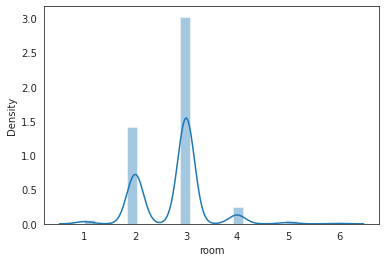

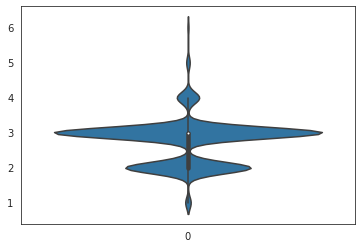

In [17]:
sns.distplot(df['room'])
plt.show()
sns.violinplot(data=df['room'])
plt.show()

### Garage

In [18]:
df['garage'].value_counts()

2        518
1        161
3        107
4         39
5          8
1 - 2      7
6          6
2 - 3      3
2 - 4      2
10         2
4 - 5      1
2 - 5      1
3 - 4      1
Name: garage, dtype: int64

In [19]:
df['garage'] = trans_values(df, 'garage')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


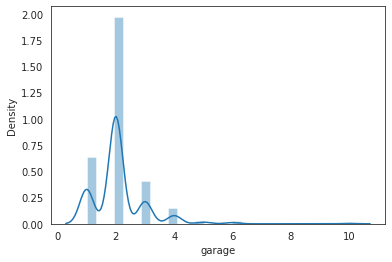

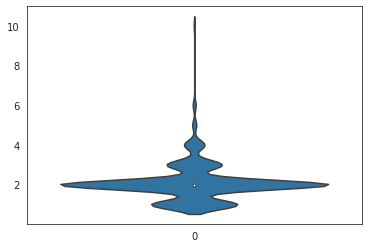

In [20]:
sns.distplot(df['garage'])
plt.show()
sns.violinplot(data=df['garage'])
plt.show()

### Area

In [21]:
df['area'].value_counts()

100 m²         45
120 m²         35
110 m²         32
70 m²          31
150 m²         20
               ..
148 m²          1
840 m²          1
78 - 103 m²     1
151 m²          1
280 m²          1
Name: area, Length: 201, dtype: int64

In [22]:
df['area'] = trans_values(df, 'area')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


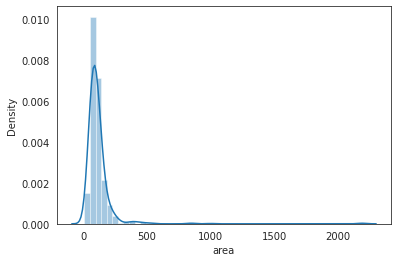

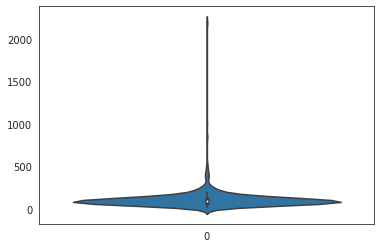

In [23]:
sns.distplot(df['area'])
plt.show()
sns.violinplot(data=df['area'])
plt.show()

### Price

In [24]:
df['price'].value_counts()

Sob consulta    43
R$ 20.000       30
R$ 18.000       22
R$ 25.000       19
R$ 350.000      16
                ..
R$ 936.034       1
R$ 672.000       1
R$ 592.000       1
R$ 865.000       1
R$ 233.000       1
Name: price, Length: 317, dtype: int64

In [25]:
df = df.drop(df[df["price"]=='Sob consulta'].index)

In [26]:
df['price'] = df['price'].str.replace(r"R$ ", "", regex=False)
df['price'] = df['price'].str.replace(r".", "", regex=False)
df['price'] = df['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


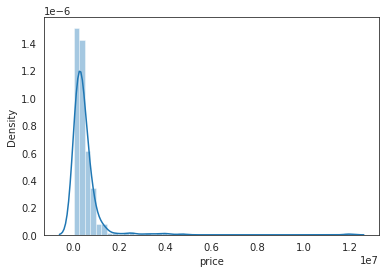

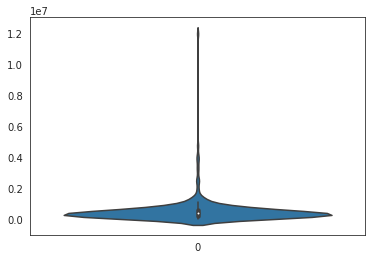

In [27]:
sns.distplot(df['price'])
plt.show()
sns.violinplot(data=df['price'])
plt.show()

### Adress

In [28]:
df['address'].value_counts()

Messejana, Fortaleza                                 26
São Bento, Fortaleza                                 18
Pedras, Fortaleza                                    18
Lagoa Redonda, Fortaleza                             15
Passaré, Fortaleza                                   12
                                                     ..
Rua Joserisse Hortêncio dos Santos, Lagoa Redonda     1
Rua Cajazeiras, Lagoa Redonda                         1
Rua José Mário Mamede, Edson Queiroz                  1
Travessa Maria Alves Ribeiro, Messejana               1
Rua Humberto Teixeira, Cajazeiras                     1
Name: address, Length: 388, dtype: int64

In [29]:
# Separando o bairro do endereço
df[['address1','address2']] = df.address.str.split(pat=', ', expand=True)

In [30]:
df['neigh'] = np.where(df['address2'] =='Fortaleza', df['address1'], df['address2'])

In [31]:
df.drop(columns= ['address', 'address1', 'address2'], axis=1, inplace=True)

In [32]:
df['neigh'].value_counts()

Messejana                  54
Aldeota                    45
São Bento                  41
Passaré                    39
Cocó                       36
                           ..
Parque Dois Irmãos          1
Conjunto Esperança          1
CIDADE NOVA                 1
Itaoca                      1
São Gonçalo do Amarante     1
Name: neigh, Length: 96, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 857
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_describe  813 non-null    object 
 1   price              813 non-null    float64
 2   area               813 non-null    float64
 3   room               813 non-null    float64
 4   bath               813 non-null    float64
 5   garage             813 non-null    float64
 6   neigh              810 non-null    object 
dtypes: float64(5), object(2)
memory usage: 83.1+ KB


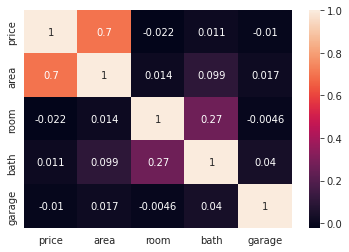

In [34]:
sns.heatmap(df.corr(), annot=True)

In [35]:
feat_num = ['price', 'area', 'room', 'bath', 'garage']

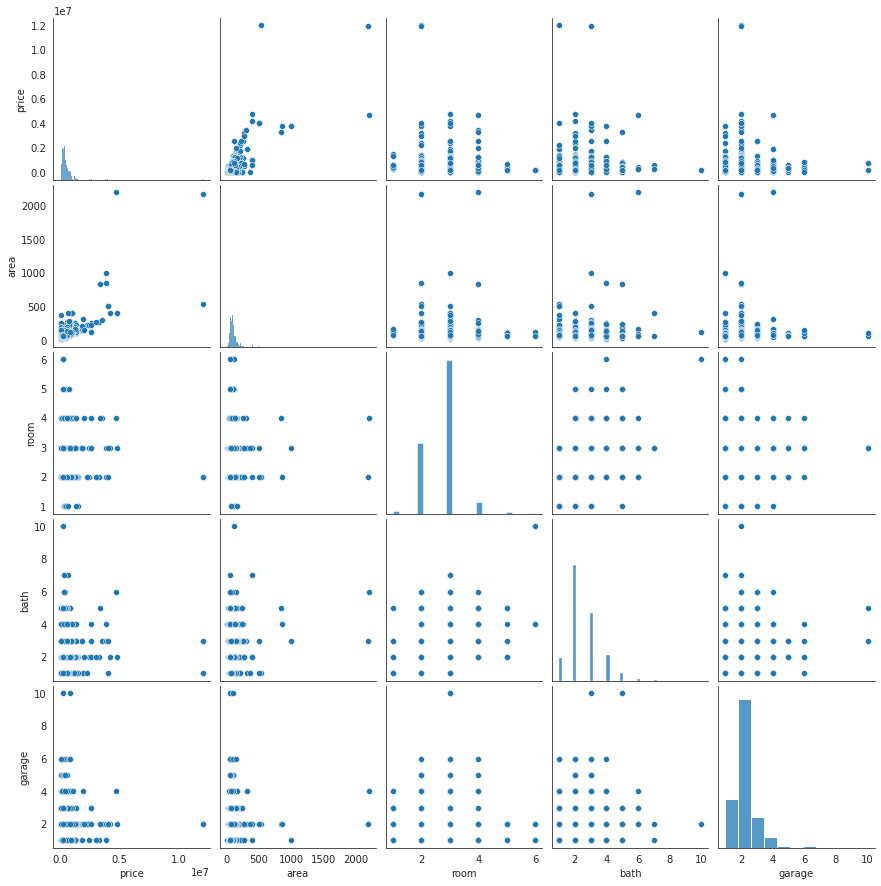

In [36]:
sns.pairplot(df[feat_num])

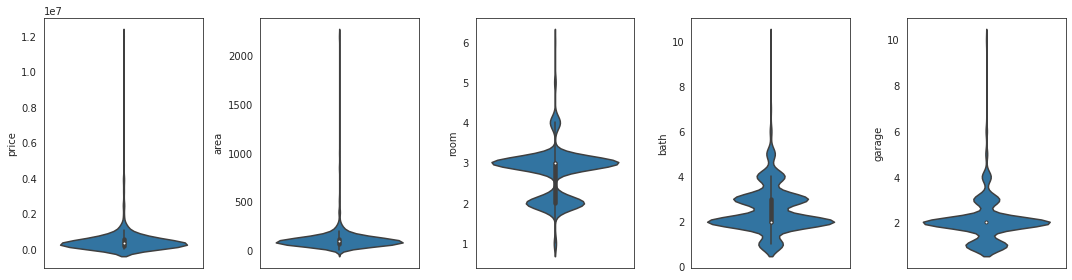

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(15,4)

for i in range(5):
  sns.violinplot(data= df, y = feat_num[i], ax=axes[i])

plt.tight_layout()

plt.show()

### Remoção de Outliers

In [38]:
df2 = df.copy()

In [39]:
def z_score_remove(df, col):
  z = np.abs(stats.zscore(df[col]))
  return df[(z<2)]

In [40]:
df2 = z_score_remove(df2, 'price')
df2 = z_score_remove(df2, 'bath')
df2 = z_score_remove(df2, 'area')
df2 = z_score_remove(df2, 'room')
df2 = z_score_remove(df2, 'garage')

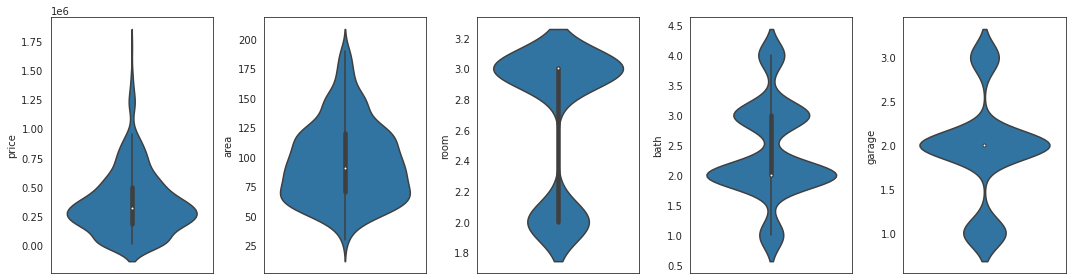

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(15,4)

for i in range(5):
  sns.violinplot(data= df2, y = feat_num[i], ax=axes[i])

plt.tight_layout()

plt.show()

In [42]:
df2.shape

(640, 7)

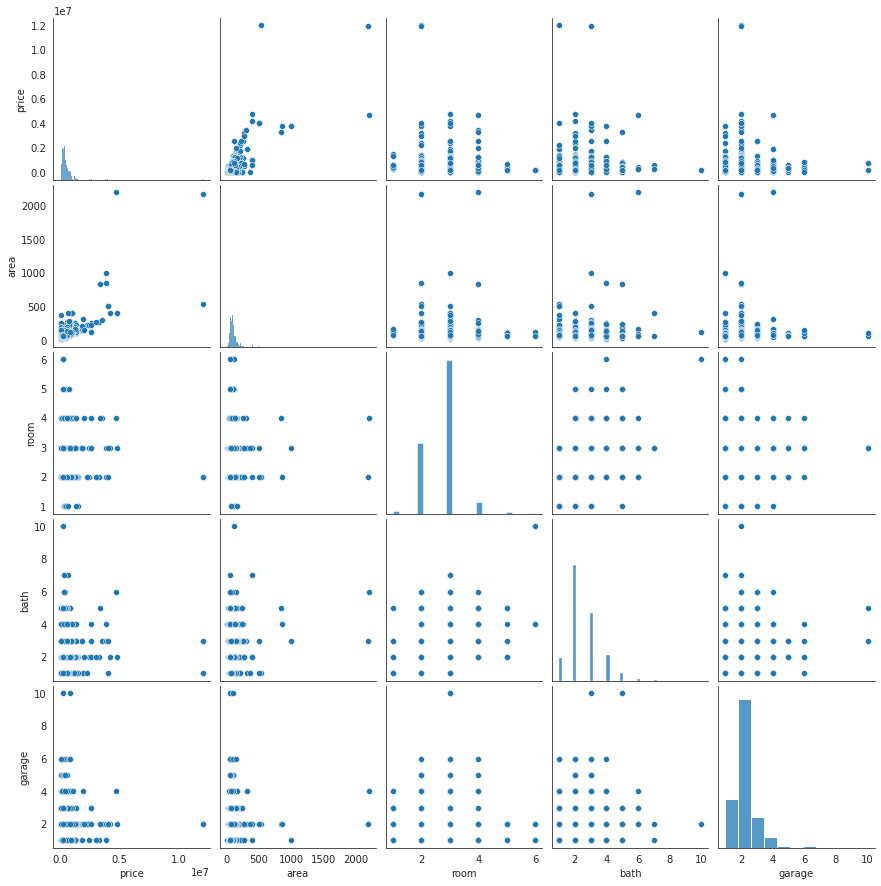

In [43]:
sns.pairplot(df[feat_num])

## Transformação de dados

In [44]:
z_score = StandardScaler()
def std_z_scale(df,col):
  df[col] = z_score.fit_transform(df[[col]])

In [45]:
for col in feat_num:
  std_z_scale(df, col)

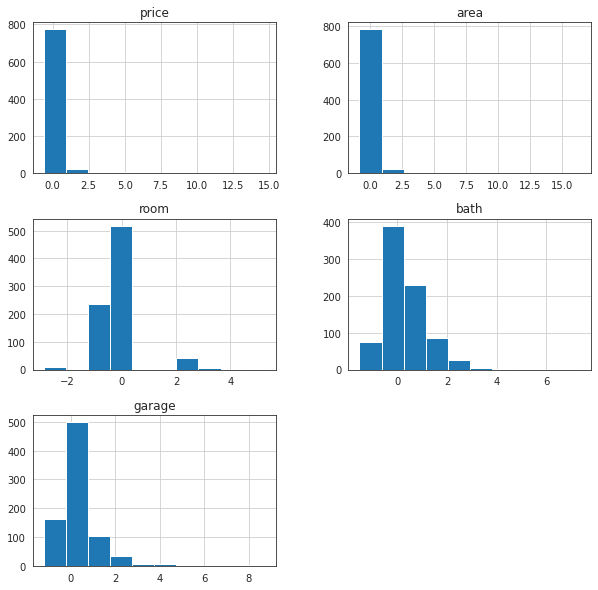

In [46]:
df[feat_num].hist(figsize=(10,10), bins=10)
plt.show()

In [47]:
df.head()

,property_describe,price,area,room,bath,garage,neigh
0,Venha morar onde o melhor da vida acontece! Ru...,0.354544,-0.114847,0.391209,1.436419,1.011649,Centro
1,"LANÇAMENTO MYRTOS CONDOMINIUM! 3 suítes, sendo...",0.243293,-0.169979,0.391209,0.450094,-0.089383,Aldeota
3,Park Brasil Residence Nosso empreendimento est...,-0.067353,-0.256616,0.391209,-0.536231,-0.089383,Parangaba
4,Vendo terreno de 2200 m² no Cambeba próximo ao...,5.394085,16.424839,2.013928,3.409070,2.112681,Cambeba
5,"Apartamento de Alto padrão, Nascente, em andar...",2.452967,0.948419,-1.231510,-0.536231,-0.089383,Meireles


In [48]:
df = df.reset_index()
df = df.drop(columns=['index','property_describe'])

In [49]:
df.head()

,price,area,room,bath,garage,neigh
0,0.354544,-0.114847,0.391209,1.436419,1.011649,Centro
1,0.243293,-0.169979,0.391209,0.450094,-0.089383,Aldeota
2,-0.067353,-0.256616,0.391209,-0.536231,-0.089383,Parangaba
3,5.394085,16.424839,2.013928,3.409070,2.112681,Cambeba
4,2.452967,0.948419,-1.231510,-0.536231,-0.089383,Meireles


## Variável categórica

In [50]:
df2 = df.copy()

In [56]:
ta_encoder = TargetEncoder(cols = 'neigh')

In [63]:
df['neigh'] = ta_encoder.fit_transform(df[['neigh']], df[['price']])

In [64]:
df.head()

,price,area,room,bath,garage,neigh
0,0.354544,-0.114847,0.391209,1.436419,1.011649,-0.068067
1,0.243293,-0.169979,0.391209,0.450094,-0.089383,0.524027
2,-0.067353,-0.256616,0.391209,-0.536231,-0.089383,-0.295453
3,5.394085,16.424839,2.013928,3.409070,2.112681,0.176398
4,2.452967,0.948419,-1.231510,-0.536231,-0.089383,1.234344


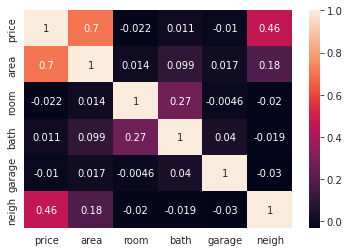

In [65]:
sns.heatmap(df2.corr(), annot=True)

### Exportando resultado

In [66]:
df.to_csv('train_test.csv', encoding='utf-8-sig')